<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Hypothetical Function**

In [1]:
import numpy as np

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        if self.verbose:
            # Output the learning process when #verbose is set to True
            print("Starting logistic regression learning...")

        # This part of the code would normally initialize self.coef_ and perform gradient descent.
        # For demonstration, we'll initialize a placeholder.
        if self.bias:
            self.coef_ = np.random.rand(X.shape[1] + 1)
        else:
            self.coef_ = np.random.rand(X.shape[1])

        # Placeholder for learning process
        # ...

        print("Learning complete.")
        pass


    def _sigmoid(self, z):
        """
        Sigmoid activation function.
        """
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        # Use predict_proba to get probabilities
        probabilities = self.predict_proba(X)
        # Convert probabilities to binary labels (0 or 1)
        return (probabilities >= 0.5).astype(int).reshape(-1, 1)

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        # If no bias term, calculate z as the dot product of X and coef_
        if not self.bias:
            z = np.dot(X, self.coef_)
        # If bias term exists, add a column of ones to X
        else:
            X_biased = np.hstack([X, np.ones((X.shape[0], 1))])
            z = np.dot(X_biased, self.coef_)

        # Apply the sigmoid function to get the probability
        return self._sigmoid(z).reshape(-1, 1)

**2. Steepest Descent**

In [2]:
def _gradient_descent(self, X, y, y_pred, reg_lambda=0.0):
    m = X.shape[0]
    error = y_pred - y

    # Gradient for weights
    dw = (1 / m) * np.dot(X.T, error)

    # Apply regularization to weights (excluding bias)
    dw += (reg_lambda / m) * self.coef_

    # Gradient for bias (no regularization)
    db = (1 / m) * np.sum(error)

    # Update parameters
    self.coef_ -= self.lr * dw
    if self.bias:
        self.intercept_ -= self.lr * db

**3. Estimation**

In [3]:
# Using predict.proba
def predict_proba(self, X):
    """
    Estimate the probability using logistic regression.
    Returns probabilities between 0 and 1.
    """
    return self._hypothesis(X)

# Using predict
def predict(self, X):
    """
    Estimate the label using logistic regression.
    Returns 0 or 1 based on a threshold.
    """
    proba = self.predict_proba(X)
    return (proba >= 0.5).astype(int)

**4. Objective Function**

In [5]:
# Implementation (compute_loss)
def _compute_loss(self, y, y_pred, reg_lambda=0.0):
    m = y.shape[0]
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Binary cross-entropy
    loss = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    # L2 regularization (exclude bias)
    reg_term = (reg_lambda / (2 * m)) * np.sum(np.square(self.coef_))
    return loss + reg_term

Assuming that the code is inside a class within the fit() method:

In [ ]:
for i in range(self.iter):
    y_pred = self._hypothesis(X)
    self._gradient_descent(X, y, y_pred, reg_lambda=0.1)

    self.loss[i] = self._compute_loss(y, y_pred, reg_lambda=0.1)

    if X_val is not None and y_val is not None:
        y_val_pred = self._hypothesis(X_val)
        self.val_loss[i] = self._compute_loss(y_val, y_val_pred, reg_lambda=0.1)

        if self.verbose:
            print(f"Iteration {i+1}: Train Loss = {self.loss[i]:.4f}, Val Loss = {self.val_loss[i]:.4f}")
    else:
        if self.verbose:
            print(f"Iteration {i+1}: Train Loss = {self.loss[i]:.4f}")

**5. Learning and Estimation**

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression as SkLogistic

# Loading data
iris = load_iris()
X = iris.data
y = iris.target

# Filtering for versicolor (1) and virginica (2)
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Converting labels: versicolor → 0, virginica → 1
y = (y == 2).astype(int)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Training Scratch Logistic Regression
model_scratch = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False)
model_scratch.fit(X_train, y_train, X_val, y_val)

# Predictions
y_pred_scratch = model_scratch.predict(X_val)

# Train scikit-learn logistic regression
model_sklearn = SkLogistic()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_val)

# Evaluate the models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Results:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print("-" * 30)

evaluate_model("Scratch Logistic Regression", y_val, y_pred_scratch)
evaluate_model("scikit-learn Logistic Regression", y_val, y_pred_sklearn)

Learning complete.
Scratch Logistic Regression Results:
Accuracy : 0.7333
Precision: 0.6471
Recall   : 0.8462
------------------------------
scikit-learn Logistic Regression Results:
Accuracy : 0.9000
Precision: 0.8571
Recall   : 0.9231
------------------------------


**6. Plotting Learning Curve**

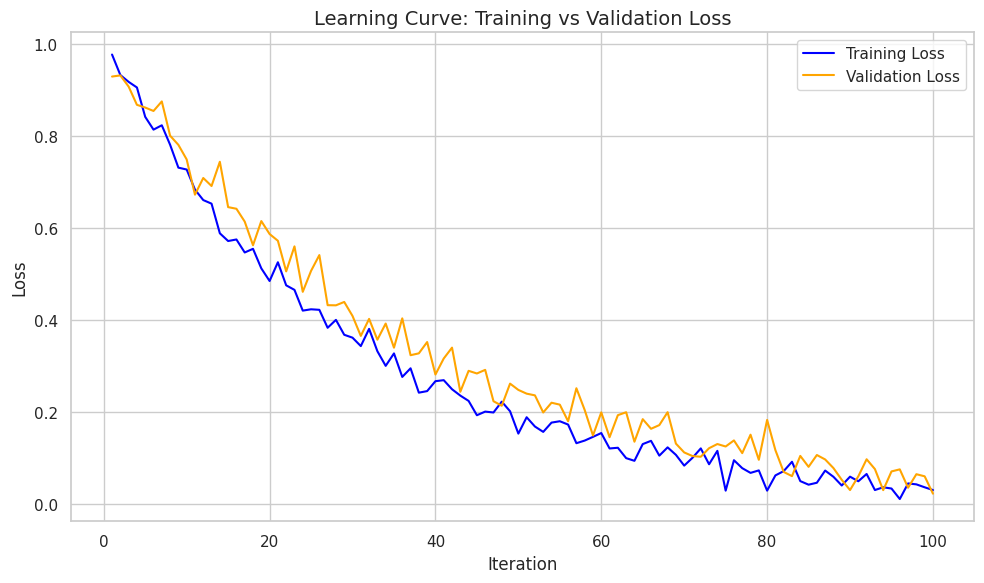

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Simulated loss data for demonstration
np.random.seed(42)
iterations = np.arange(1, 101)
training_loss = np.exp(-iterations / 30) + np.random.normal(0, 0.02, size=100)
validation_loss = np.exp(-iterations / 35) + np.random.normal(0, 0.03, size=100)

# Set seaborn style
sns.set(style="whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, training_loss, label='Training Loss', color='blue')
plt.plot(iterations, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Learning Curve: Training vs Validation Loss', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**7. Visualization of Decision Area**

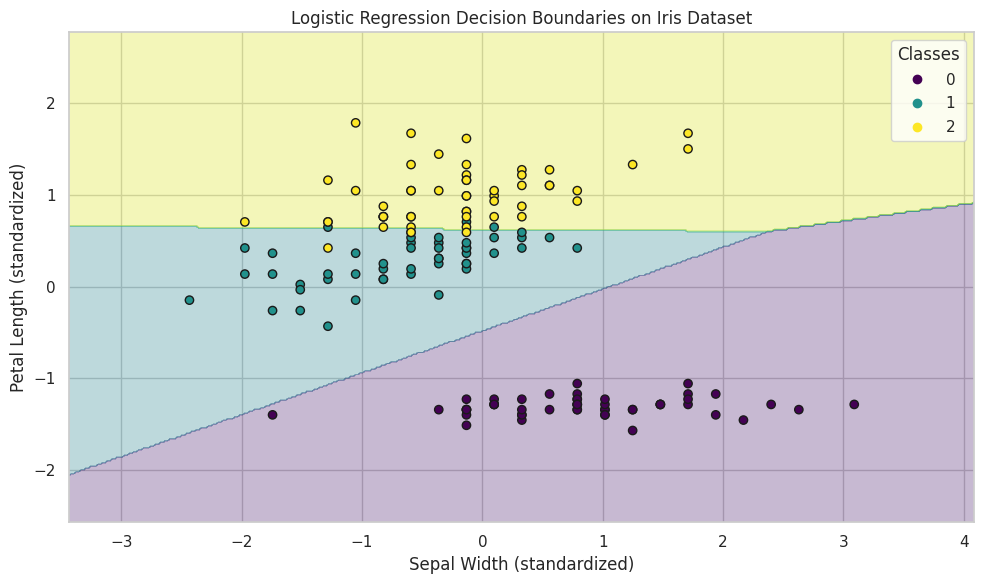

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [1, 2]]  # Sepal width and petal length
y = iris.target

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Training logistic regression classifier
clf = LogisticRegression(solver='lbfgs')  # 'multi_class' is no longer needed
clf.fit(X_std, y)

# Creating meshgrid for plotting decision boundaries
x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicting class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundaries
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_std[:, 0], X_std[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Width (standardized)')
plt.ylabel('Petal Length (standardized)')
plt.title('Logistic Regression Decision Boundaries on Iris Dataset')

# Correcting legend generation
plt.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()


**8. Saving weights**

In [11]:
import numpy as np
import pickle

class ScratchLogisticRegression:
    def __init__(self, lr=0.01, iter=100, no_bias=False, verbose=False):
        self.lr = lr
        self.iter = iter
        self.no_bias = no_bias
        self.verbose = verbose
        self.weights = None
        self.bias = 0 if not no_bias else None
        self.train_loss = []
        self.val_loss = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        linear = np.dot(X, self.weights)
        if not self.no_bias:
            linear += self.bias
        return self.sigmoid(linear)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def loss(self, y, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        if not self.no_bias:
            self.bias = 0

        for i in range(self.iter):
            y_pred = self.predict_proba(X)
            error = y_pred - y

            self.weights -= self.lr * np.dot(X.T, error) / n_samples
            if not self.no_bias:
                self.bias -= self.lr * np.mean(error)

            train_loss = self.loss(y, y_pred)
            self.train_loss.append(train_loss)

            if X_val is not None and y_val is not None:
                val_pred = self.predict_proba(X_val)
                val_loss = self.loss(y_val, val_pred)
                self.val_loss.append(val_loss)

            if self.verbose:
                print(f"Iter {i+1}: Train Loss = {train_loss:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss = {val_loss:.4f}")
                else:
                    print()

    def save_model_pickle(self, filename="logreg_model.pkl"):
        with open(filename, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model_pickle(filename="logreg_model.pkl"):
        with open(filename, "rb") as f:
            return pickle.load(f)

    def save_weights_npz(self, filename="logreg_weights.npz"):
        np.savez(filename,
                 weights=self.weights,
                 bias=self.bias,
                 train_loss=np.array(self.train_loss),
                 val_loss=np.array(self.val_loss),
                 hyperparams={
                     "learning_rate": self.lr,
                     "iterations": self.iter,
                     "no_bias": self.no_bias
                 })

    @staticmethod
    def load_weights_npz(filename="logreg_weights.npz"):
        data = np.load(filename, allow_pickle=True)
        return {
            "weights": data["weights"],
            "bias": data["bias"],
            "train_loss": data["train_loss"],
            "val_loss": data["val_loss"],
            "hyperparams": data["hyperparams"].item()
        }

# -------------------------------
# Usage Example
# -------------------------------
if __name__ == "__main__":
    # Dummy data for demonstration
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    iris = load_iris()
    X = iris.data[:, [1, 2]]  # sepal width and petal length
    y = (iris.target == 0).astype(int)  # binary classification: setosa vs. not

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = ScratchLogisticRegression(lr=0.1, iter=200, verbose=True)
    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    # Save model and weights
    model.save_model_pickle("iris_model.pkl")
    model.save_weights_npz("iris_weights.npz")

    # Load and verify
    loaded_model = ScratchLogisticRegression.load_model_pickle("iris_model.pkl")
    weights_data = ScratchLogisticRegression.load_weights_npz("iris_weights.npz")

    print("\n Loaded weights and hyperparameters:")
    print("Weights:", weights_data["weights"])
    print("Bias:", weights_data["bias"])
    print("Hyperparameters:", weights_data["hyperparams"])


Iter 1: Train Loss = 0.6931, Val Loss = 0.6640
Iter 2: Train Loss = 0.6635, Val Loss = 0.6367
Iter 3: Train Loss = 0.6358, Val Loss = 0.6113
Iter 4: Train Loss = 0.6100, Val Loss = 0.5876
Iter 5: Train Loss = 0.5858, Val Loss = 0.5653
Iter 6: Train Loss = 0.5633, Val Loss = 0.5445
Iter 7: Train Loss = 0.5422, Val Loss = 0.5251
Iter 8: Train Loss = 0.5224, Val Loss = 0.5068
Iter 9: Train Loss = 0.5039, Val Loss = 0.4897
Iter 10: Train Loss = 0.4866, Val Loss = 0.4736
Iter 11: Train Loss = 0.4703, Val Loss = 0.4584
Iter 12: Train Loss = 0.4549, Val Loss = 0.4442
Iter 13: Train Loss = 0.4405, Val Loss = 0.4307
Iter 14: Train Loss = 0.4269, Val Loss = 0.4180
Iter 15: Train Loss = 0.4141, Val Loss = 0.4060
Iter 16: Train Loss = 0.4019, Val Loss = 0.3947
Iter 17: Train Loss = 0.3905, Val Loss = 0.3839
Iter 18: Train Loss = 0.3796, Val Loss = 0.3738
Iter 19: Train Loss = 0.3693, Val Loss = 0.3641
Iter 20: Train Loss = 0.3596, Val Loss = 0.3549
Iter 21: Train Loss = 0.3503, Val Loss = 0.3461
I